### EX1 do transition matrix

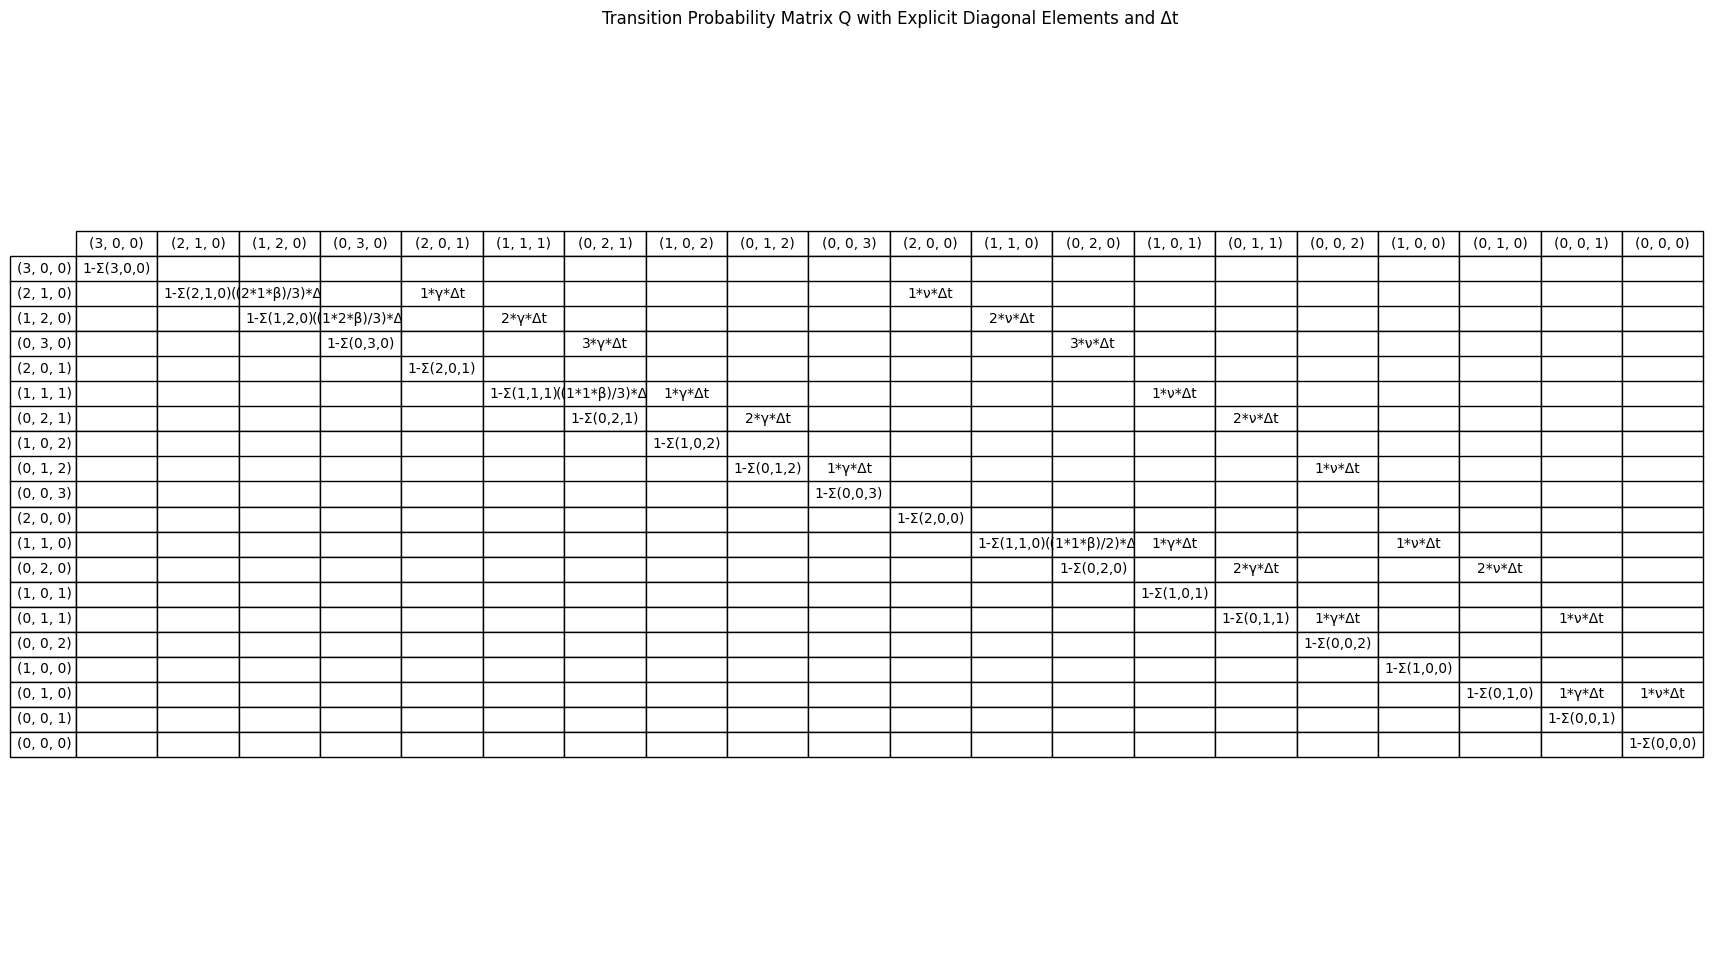

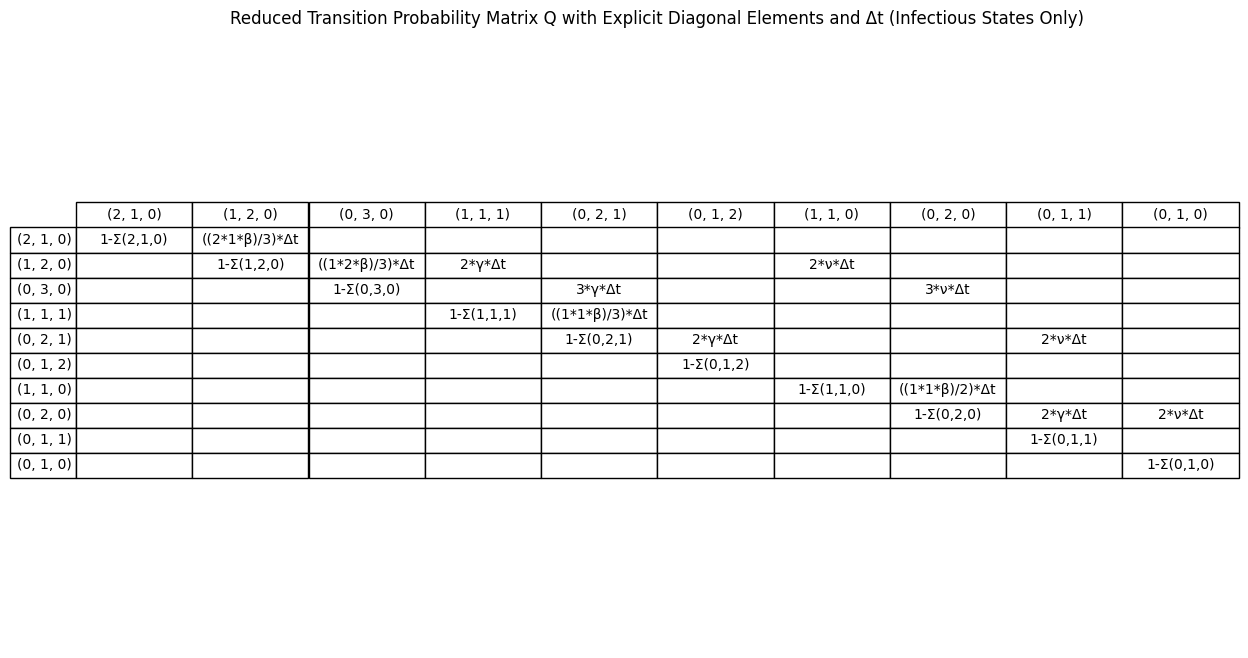

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the SIRD model
states = [
    (3, 0, 0), (2, 1, 0), (1, 2, 0), (0, 3, 0),  # Total: 3
    (2, 0, 1), (1, 1, 1), (0, 2, 1),             # Total: 3
    (1, 0, 2), (0, 1, 2), (0, 0, 3),             # Total: 3
    (2, 0, 0), (1, 1, 0), (0, 2, 0),             # Total: 2
    (1, 0, 1), (0, 1, 1), (0, 0, 2),             # Total: 2
    (1, 0, 0), (0, 1, 0),                        # Total: 1
    (0, 0, 1), (0, 0, 0)                         # Total: 0
]

# Initialize symbolic transition rate matrix with placeholders
Q_sym = np.empty((len(states), len(states)), dtype=object)

# Define a helper function to find the index of a state in the states list
def get_state_index(state):
    return states.index(state)

# Fill in the symbolic transition matrix based on the transition rules
for idx, (S, I, R) in enumerate(states):
    N_state = S + I + R  # Total population for this state
    diagonal_elements = []  # Track elements to construct diagonal entry

    # Infection event (S -> S-1, I -> I+1)
    if S > 0 and I > 0:
        new_state = (S - 1, I + 1, R)
        rate = f"(({S}*{I}*β)/{N_state})*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Recovery event (I -> I-1, R -> R+1)
    if I > 0:
        new_state = (S, I - 1, R + 1)
        rate = f"{I}*γ*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Mortality event (I -> I-1, R stays the same)
    if I > 0:
        new_state = (S, I - 1, R)
        rate = f"{I}*ν*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Diagonal element explicitly listing the rates
    Q_sym[idx, idx] = f"1-Σ({S},{I},{R})"

# Plot the full symbolic matrix as a table
fig, ax = plt.subplots(figsize=(14, 12))
ax.axis('off')
table = ax.table(cellText=Q_sym, rowLabels=states, colLabels=states, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title("Transition Probability Matrix Q with Explicit Diagonal Elements and Δt")
plt.show()

# Create the Reduced Matrix (only states with I > 0)
infected_states = [state for state in states if state[1] > 0]  # Filter only states with I > 0
Q_reduced_sym = np.empty((len(infected_states), len(infected_states)), dtype=object)

# Populate the reduced matrix with symbolic placeholders
for idx, (S, I, R) in enumerate(infected_states):
    N_state = S + I + R  # Total population for this state
    diagonal_elements = []  # Track elements to construct diagonal entry
    for next_idx, (S_next, I_next, R_next) in enumerate(infected_states):
        if idx == next_idx:
            continue  # Skip diagonal elements here

        # Infection event
        if S > 0 and I_next == I + 1 and S_next == S - 1 and R_next == R:
            rate = f"(({S}*{I}*β)/{N_state})*Δt"
            Q_reduced_sym[idx, next_idx] = rate
            diagonal_elements.append(f"-{rate}")
        
        # Recovery event
        if I > 0 and I_next == I - 1 and R_next == R + 1 and S_next == S:
            rate = f"{I}*γ*Δt"
            Q_reduced_sym[idx, next_idx] = rate
            diagonal_elements.append(f"-{rate}")

        # Mortality event
        if I > 0 and I_next == I - 1 and S_next == S and R_next == R:
            rate = f"{I}*ν*Δt"
            Q_reduced_sym[idx, next_idx] = rate
            diagonal_elements.append(f"-{rate}")

    # Diagonal element explicitly listing the rates
    Q_reduced_sym[idx, idx] = f"1-Σ({S},{I},{R})"

# Plot the reduced symbolic matrix as a table
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')
table = ax.table(cellText=Q_reduced_sym, rowLabels=infected_states, colLabels=infected_states, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title("Reduced Transition Probability Matrix Q with Explicit Diagonal Elements and Δt (Infectious States Only)")
plt.show()


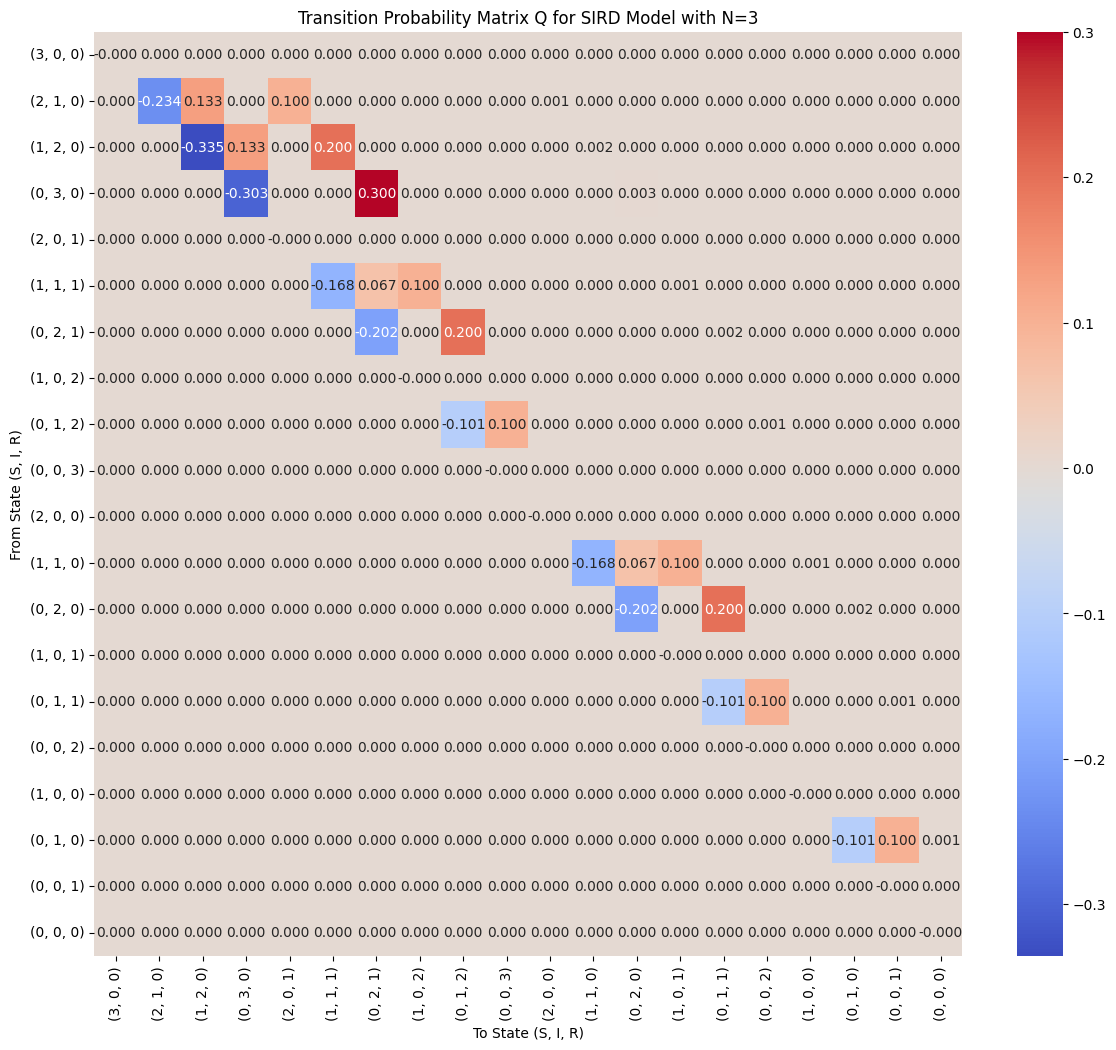

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters for the SIRD model
N = 3  # Total population size
beta = 0.2  # Infection rate per contact
gamma = 0.1  # Recovery rate
nu = 0.001   # Mortality rate

# Define all possible states for a population of size N = 3, ensuring we have every possible combination
# States are represented as (S, I, R), where S = Susceptible, I = Infectious, R = Recovered
states = [
    (3, 0, 0),  # Total: 3 - All susceptible
    (2, 1, 0),  # Total: 3 - Two susceptible, one infectious
    (1, 2, 0),  # Total: 3 - One susceptible, two infectious
    (0, 3, 0),  # Total: 3 - All infectious
    (2, 0, 1),  # Total: 3 - Two susceptible, none infectious, one recovered
    (1, 1, 1),  # Total: 3 - One susceptible, one infectious, one recovered
    (0, 2, 1),  # Total: 3 - None susceptible, two infectious, one recovered
    (1, 0, 2),  # Total: 3 - One susceptible, none infectious, two recovered
    (0, 1, 2),  # Total: 3 - None susceptible, one infectious, two recovered
    (0, 0, 3),  # Total: 3 - All recovered
    (2, 0, 0),  # Total: 2 - Two susceptible, no infectious or recovered (intermediate state)
    (1, 1, 0),  # Total: 2 - One susceptible, one infectious, no recovered (intermediate state)
    (0, 2, 0),  # Total: 2 - None susceptible, two infectious, no recovered (intermediate state)
    (1, 0, 1),  # Total: 2 - One susceptible, no infectious, one recovered (intermediate state)
    (0, 1, 1),  # Total: 2 - None susceptible, one infectious, one recovered (intermediate state)
    (0, 0, 2),  # Total: 2 - None susceptible, no infectious, two recovered (intermediate state)
    (1, 0, 0),  # Total: 1 - One susceptible, no infectious, no recovered (intermediate state)
    (0, 1, 0),  # Total: 1 - None susceptible, one infectious, no recovered (intermediate state)
    (0, 0, 1),  # Total: 1 - None susceptible, no infectious, one recovered (absorbing state)
    (0, 0, 0)   # Total: 0 - All dead
]

# Initialize the transition probability matrix Q as an 20x20 matrix
Q = np.zeros((len(states), len(states)))

# Define a helper function to find the index of a state in the states list
def get_state_index(state):
    return states.index(state)

# Fill in the transition matrix Q based on the defined transition rules
for idx, (S, I, R) in enumerate(states):
    # Transition 1: Infection event (S -> S-1, I -> I+1)
    if S > 0 and I > 0:
        new_state = (S - 1, I + 1, R)
        rate_infection = beta * S * I / N
        Q[idx, get_state_index(new_state)] = rate_infection
    
    # Transition 2: Recovery event (I -> I-1, R -> R+1)
    if I > 0:
        new_state = (S, I - 1, R + 1)
        rate_recovery = gamma * I
        Q[idx, get_state_index(new_state)] = rate_recovery
    
    # Transition 3: Mortality event (I -> I-1, R stays the same)
    if I > 0:
        new_state = (S, I - 1, R)
        rate_mortality = nu * I
        Q[idx, get_state_index(new_state)] = rate_mortality

    # Diagonal element (staying in the same state) to make rows sum to 0
    Q[idx, idx] = -np.sum(Q[idx, :])

# Display the resulting transition matrix Q as a heatmap for better visualization
plt.figure(figsize=(14, 12))
sns.heatmap(Q, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=states, yticklabels=states)
plt.title("Transition Probability Matrix Q for SIRD Model with N=3")
plt.xlabel("To State (S, I, R)")
plt.ylabel("From State (S, I, R)")
plt.show()


Text(0.5, 1.0, 'Transition Probability Matrix Q for SEIR Model')

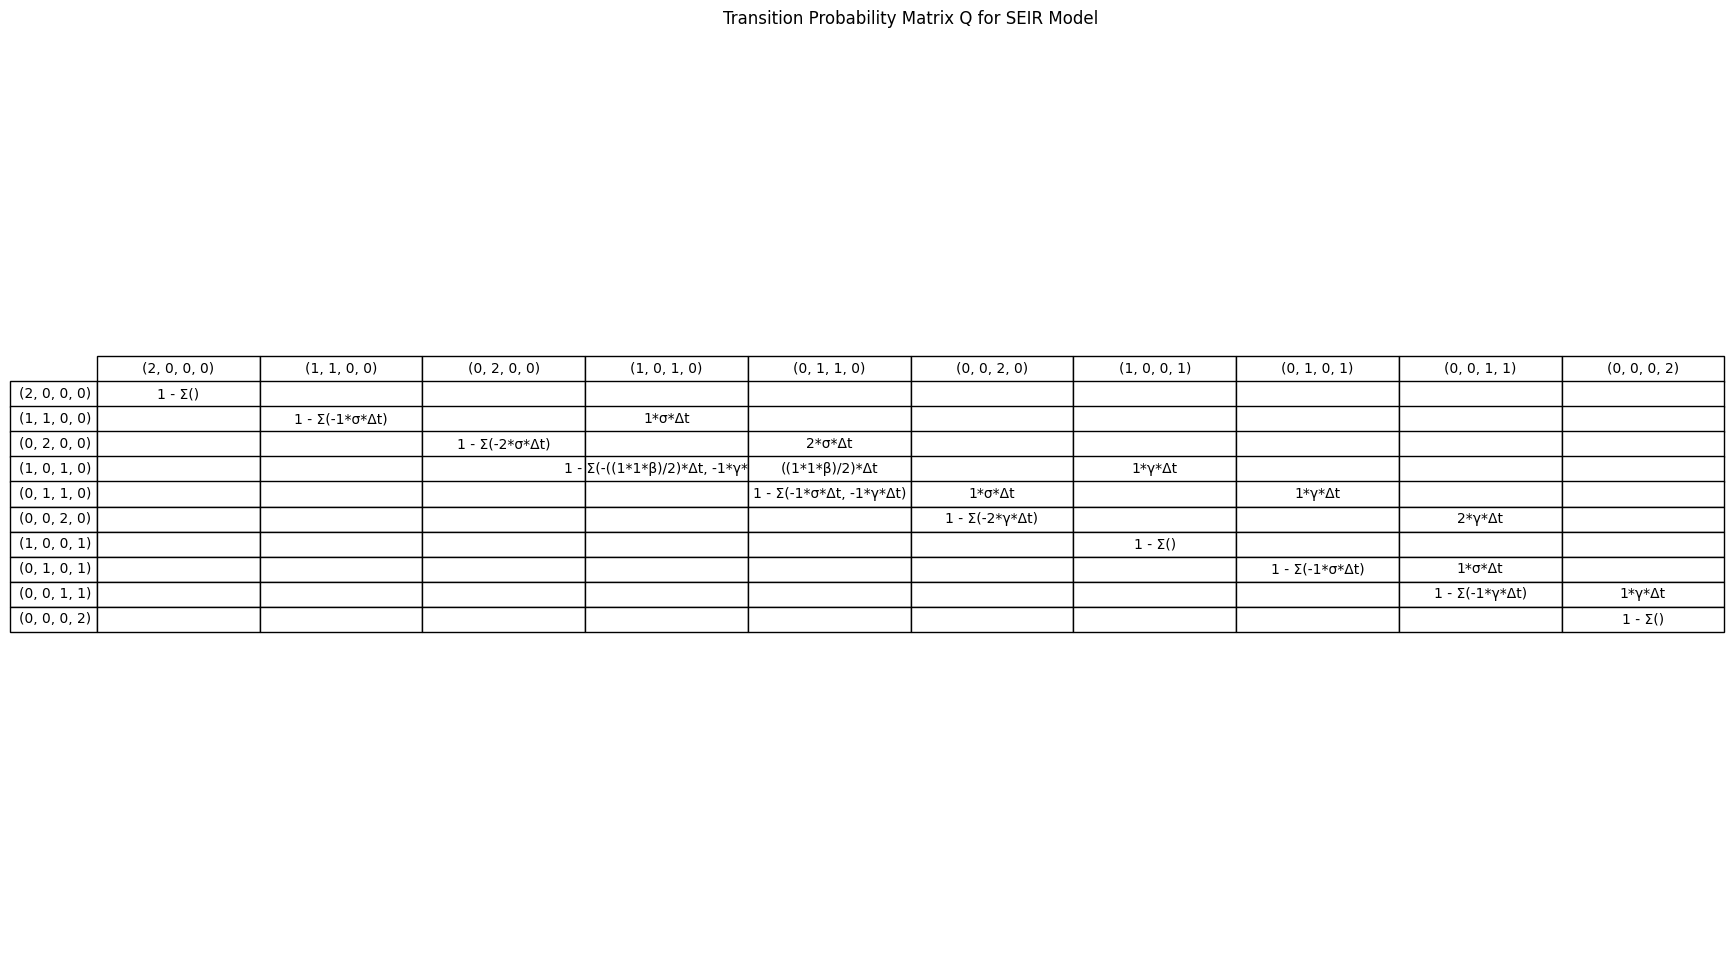

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define states for the SEIR model
states = [
    (2, 0, 0, 0), (1, 1, 0, 0), (0, 2, 0, 0),           # N=2
    (1, 0, 1, 0), (0, 1, 1, 0), (0, 0, 2, 0),           # N=2
    (1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1), (0, 0, 0, 2)  # N=2
]

# Initialize symbolic transition rate matrix
Q_sym = np.empty((len(states), len(states)), dtype=object)

# Define a helper function to find the index of a state in the states list
def get_state_index(state):
    return states.index(state)

# Populate the symbolic transition matrix
for idx, (S, E, I, R) in enumerate(states):
    N_state = S + E + I + R  # Total population for this state
    diagonal_elements = []  # Track elements to construct diagonal entry

    # Transition: Susceptible to Exposed (S -> S-1, E -> E+1)
    if S > 0 and I > 0:
        new_state = (S - 1, E + 1, I, R)
        rate = f"(({S}*{I}*β)/{N_state})*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Transition: Exposed to Infectious (E -> E-1, I -> I+1)
    if E > 0:
        new_state = (S, E - 1, I + 1, R)
        rate = f"{E}*σ*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Transition: Infectious to Recovered (I -> I-1, R -> R+1)
    if I > 0:
        new_state = (S, E, I - 1, R + 1)
        rate = f"{I}*γ*Δt"
        Q_sym[idx, get_state_index(new_state)] = rate
        diagonal_elements.append(f"-{rate}")

    # Diagonal element: Staying in the same state
    Q_sym[idx, idx] = f"1 - Σ({', '.join(diagonal_elements)})"

# Plot the full symbolic matrix as a table
fig, ax = plt.subplots(figsize=(14, 12))
ax.axis('off')
table = ax.table(cellText=Q_sym, rowLabels=states, colLabels=states, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title("Transition Probability Matrix Q for SEIR Model")


### Ex 2: Simulate 100 trajectories of the SIR Markov process up to absorption
with N = 1000, (S(0), I(0), R(0)) = (990, 10, 0), β = 0.2, γ = 0.1, and ν = 0.001. Remember to save the
simulated trajectories (values of (S, I, R) over time) so that you can answer the following
questions. Explain the algorithm used for the simulations.

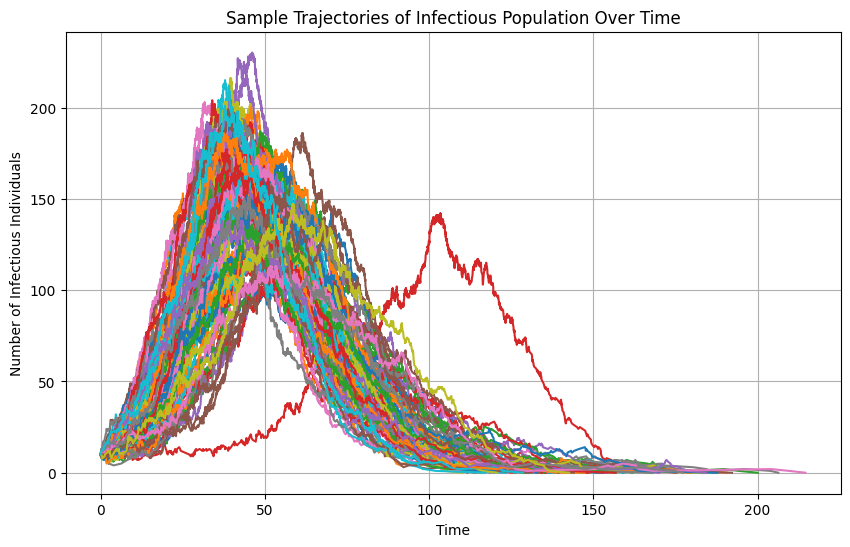

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the SIRD model for N = 1000
N = 1000  # Total population size
beta = 0.2  # Infection rate per contact
gamma = 0.1  # Recovery rate
nu = 0.001   # Mortality rate

# Initial population counts
S0 = 990  # Initial susceptible count
I0 = 10   # Initial infectious count
R0 = 0    # Initial recovered count

# Number of simulations
num_simulations = 100

# Storage for all trajectories
trajectories = []

# Simulation loop
for sim in range(num_simulations):
    # Initialize the current state
    S, I, R = S0, I0, R0
    t = 0  # Start time
    trajectory = [(t, S, I, R)]  # Record initial state
    
    # Run until absorbing state (I = 0)
    while I > 0:
        # Calculate rates of each possible transition
        infection_rate = beta * S * I / N
        recovery_rate = gamma * I
        mortality_rate = nu * I
        total_rate = infection_rate + recovery_rate + mortality_rate
        
        # Sample time to next event from an exponential distribution
        time_to_next_event = np.random.exponential(1 / total_rate)
        t += time_to_next_event  # Advance time by this sampled amount
        
        # Choose which event occurs
        event_prob = np.random.uniform(0, 1)
        
        # Infection event
        if event_prob < infection_rate / total_rate:
            S -= 1
            I += 1
        # Recovery event
        elif event_prob < (infection_rate + recovery_rate) / total_rate:
            I -= 1
            R += 1
        # Mortality event
        else:
            I -= 1
        
        # Record the new state after the event
        trajectory.append((t, S, I, R))
    
    # Save the trajectory for this simulation
    trajectories.append(trajectory)

# Plot sample trajectories (e.g., 25 trajectories)
plt.figure(figsize=(10, 6))
#for i in range(min(10, num_simulations)):
for i in range(num_simulations):
    times = [state[0] for state in trajectories[i]]
    S_values = [state[1] for state in trajectories[i]]
    I_values = [state[2] for state in trajectories[i]]
    R_values = [state[3] for state in trajectories[i]]
    plt.plot(times, I_values) #, label=f"Trajectory {i+1} (Infectious)"
plt.xlabel("Time")
plt.ylabel("Number of Infectious Individuals")
plt.title("Sample Trajectories of Infectious Population Over Time")
#plt.legend()
plt.grid()
plt.show()

### Ex 3 Calculate the empirical mean and variance of the epidemic duration
(defined as Text = inf{t ≥ 0 : I(t) = 0}).

In [4]:
# Calculate the epidemic duration (T_ext) for each trajectory
epidemic_durations = []

for trajectory in trajectories:
    # Find the step where I(t) became zero -> Ending the pandemic
    for (time, S, I, R) in trajectory:
        if I == 0:  # Epidemic is ended the first time I(t) hits 0
            epidemic_durations.append(time)
            break

epidemic_durations = np.array(epidemic_durations)

# Calculate the empirical mean and variance of the epidemic durations
mean_duration = np.mean(epidemic_durations)
variance_duration = np.var(epidemic_durations)

# Print the results
print("Empirical Mean of Epidemic Duration (T_ext):", mean_duration)
print("Empirical Variance of Epidemic Duration (T_ext):", variance_duration)


Empirical Mean of Epidemic Duration (T_ext): 146.89609783333333
Empirical Variance of Epidemic Duration (T_ext): 535.6532607866267


### Ex 4: Calculate the empirical mean and the empirical variance of the final size of the epidemic
which is equal to N − SText (corresponding to the number of individuals who were infected
between the start of the epidemic at time 0 and the end of the epidemic at time Text)

In [5]:
# Calculate the final size of the epidemic for each simulation
final_sizes = []

for trajectory in trajectories:
    # Find the last time step in the trajectory where I(t) became zero
    for (time, S, I, R) in trajectory:
        if I == 0:
            final_sizes.append(N-S)
            break

final_sizes = np.array(final_sizes)

# Calculate the empirical mean and variance of the final sizes
mean_final_size = np.mean(final_sizes)
variance_final_size = np.var(final_sizes)


# Convert the list of final sizes into a NumPy array for easier calculations
final_sizes = np.array(final_sizes)

# Print the results
print("Empirical Mean of Final Size of the Epidemic:", mean_final_size)
print("Empirical Variance of Final Size of the Epidemic:", variance_final_size)


Empirical Mean of Final Size of the Epidemic: 794.04
Empirical Variance of Final Size of the Epidemic: 707.4384


### Ex5: Graph 10 simulated trajectories
of (S, I, R, D) in the same graph (you can use different colors for each compartment)

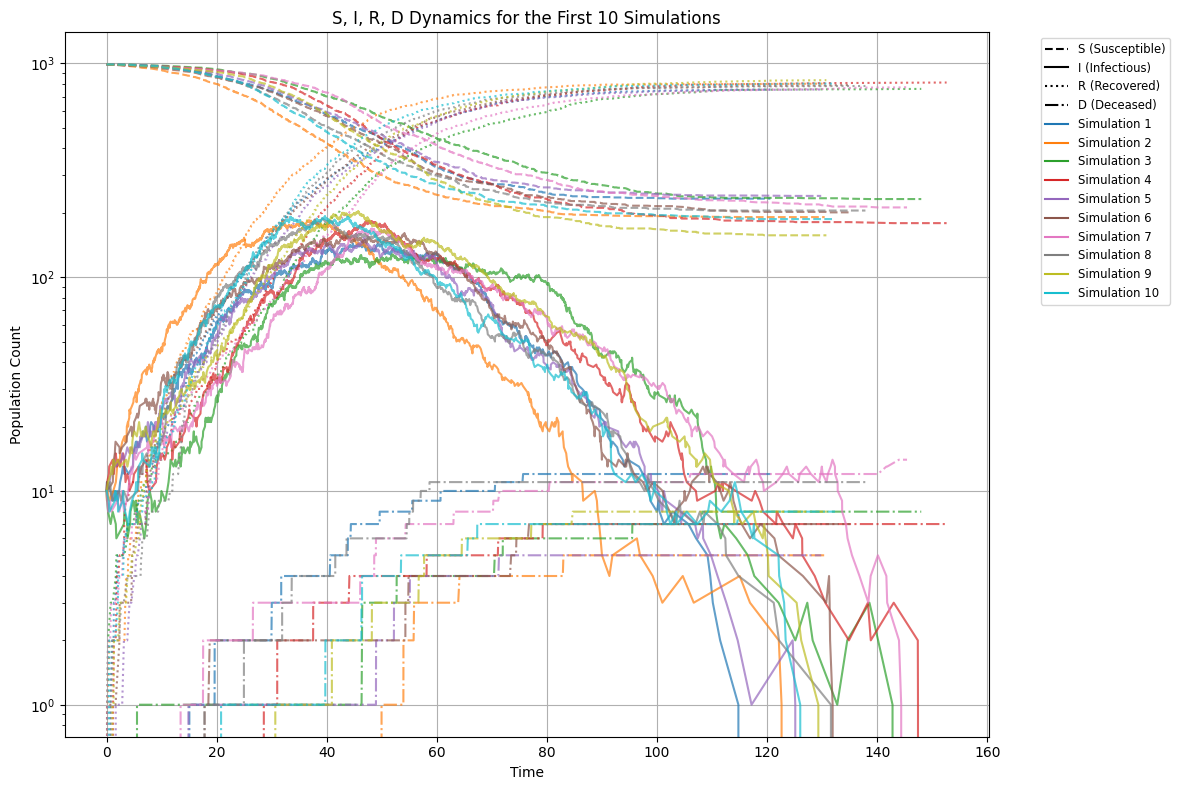

In [6]:
# Plot S, I, R, and D for the first 10 simulations in a single plot with consistent colors per simulation
plt.figure(figsize=(12, 8))

colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Generate distinct colors for 10 simulations

for i in range(10):  # Loop through the first 10 simulations
    times = [state[0] for state in trajectories[i]]
    S_values = [state[1] for state in trajectories[i]]
    I_values = [state[2] for state in trajectories[i]]
    R_values = [state[3] for state in trajectories[i]]
    D_values = [N - state[1] - state[2] - state[3] for state in trajectories[i]]

    # Use the same color for all curves of this simulation
    plt.plot(times, S_values, color=colors[i], alpha=0.7, linestyle='--')
    plt.plot(times, I_values, color=colors[i], alpha=0.7)
    plt.plot(times, R_values, color=colors[i], alpha=0.7, linestyle=':')
    plt.plot(times, D_values, color=colors[i], alpha=0.7, linestyle='-.')

# Add main labels and grid
plt.xlabel("Time")
plt.ylabel("Population Count")
plt.title("S, I, R, D Dynamics for the First 10 Simulations")
plt.grid()

# Add a legend for the linestyles
from matplotlib.lines import Line2D
style_legend = [
    Line2D([0], [0], color='black', linestyle='--', label="S (Susceptible)"),
    Line2D([0], [0], color='black', linestyle='-', label="I (Infectious)"),
    Line2D([0], [0], color='black', linestyle=':', label="R (Recovered)"),
    Line2D([0], [0], color='black', linestyle='-.', label="D (Deceased)")
]
sim_legend = [
    Line2D([0], [0], color=colors[i], label=f"Simulation {i+1}") for i in range(10)
]

# Combine legends
plt.legend(handles=style_legend + sim_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
# Set logarithmic scale for y-axis
plt.yscale("log")
plt.show()

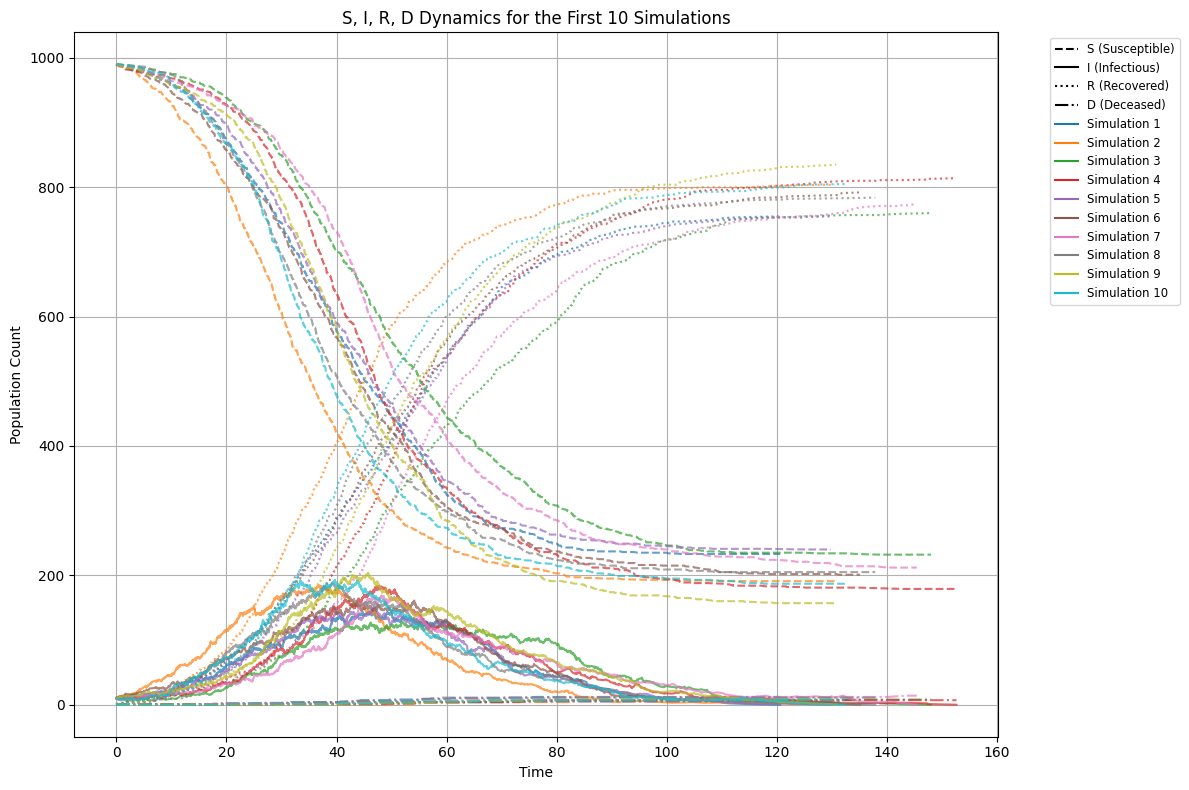

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Plot S, I, R, and D for the first 10 simulations in a single plot with consistent colors per simulation
plt.figure(figsize=(12, 8))

colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Generate distinct colors for 10 simulations

for i in range(10):  # Loop through the first 10 simulations
    times = [state[0] for state in trajectories[i]]
    S_values = [state[1] for state in trajectories[i]]
    I_values = [state[2] for state in trajectories[i]]
    R_values = [state[3] for state in trajectories[i]]
    D_values = [N - state[1] - state[2] - state[3] for state in trajectories[i]]

    # Use the same color for all curves of this simulation
    plt.plot(times, S_values, color=colors[i], alpha=0.7, linestyle='--')
    plt.plot(times, I_values, color=colors[i], alpha=0.7)
    plt.plot(times, R_values, color=colors[i], alpha=0.7, linestyle=':')
    plt.plot(times, D_values, color=colors[i], alpha=0.7, linestyle='-.')

# Add main labels and grid
plt.xlabel("Time")
plt.ylabel("Population Count")
plt.title("S, I, R, D Dynamics for the First 10 Simulations")
plt.grid()

# Add a legend for the linestyles
from matplotlib.lines import Line2D
style_legend = [
    Line2D([0], [0], color='black', linestyle='--', label="S (Susceptible)"),
    Line2D([0], [0], color='black', linestyle='-', label="I (Infectious)"),
    Line2D([0], [0], color='black', linestyle=':', label="R (Recovered)"),
    Line2D([0], [0], color='black', linestyle='-.', label="D (Deceased)")
]
sim_legend = [
    Line2D([0], [0], color=colors[i], label=f"Simulation {i+1}") for i in range(10)
]

# Combine legends
plt.legend(handles=style_legend + sim_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
# Set logarithmic scale for y-axis
#plt.yscale("log")
plt.show()